In [18]:
import numpy as np
def sigmoid(x):
    
    z=1/(1+np.exp(-x))
    
    return z

def initialize_params(dims):
    w=np.zeros((dims,1))
    b=0
    return w,b

In [19]:
def logistic(X,y,w,b):
    num_train=X.shape[0]
    num_feature=X.shape[1]
    
    a=sigmoid(np.dot(X,w)+b)
    cost=-1/num_train*np.sum(y*np.log(a)+(1-y)*np.log(a))
    dw=np.dot(X.T,(a-y))/num_train
    db=np.sum(a-y)/num_train
    
    cost=np.squeeze(cost)
    return a,cost,dw,db

In [25]:
def logistic_train(X,y,learning_rate,epochs):
    w,b=initialize_params(X.shape[1])
    cost_list=[]
    
    for i in range(epochs):
        a,cost,dw,db=logistic(X,y,w,b)
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        if i%100==0:
            cost_list.append(cost)
            print('epoch %d cost %f'%(i,cost))
    
    params={
        'w':w,
        'b':b
    }
    grads={
        'dw':dw,
        'db':db
    }
    return cost_list,params,grads    

In [21]:
def predict(X,params):
    y_pred=sigmoid(np.dot(X,params['w'])+params['b'])
    for i in range(len(y_pred)):
        if y_pred[i]>0.5:
            y_pred[i]=1
        else:
            y_pred[i]=0
    return y_pred

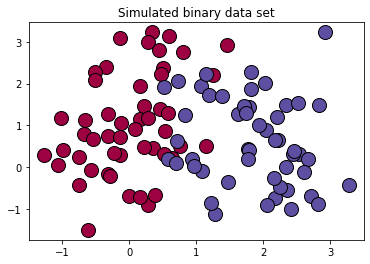

In [22]:
# 导入matplotlib绘图库
import matplotlib.pyplot as plt
# 导入生成分类数据函数
from sklearn.datasets import make_classification
# 生成100×2的模拟二分类数据集
X, labels = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=2)
# 设置随机数种子
rng = np.random.RandomState(2)
# 对生成的特征数据添加一组均匀分布噪声
X += 2 * rng.uniform(size=X.shape)
# 标签类别数
unique_labels = set(labels)
# 根据标签类别数设置颜色
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
# 绘制模拟数据的散点图
for k,col in zip(unique_labels, colors):
    x_k = X[labels==k]
    plt.plot(x_k[:,0], x_k[:,1],'o',
             markerfacecolor=col,
             markeredgecolor='k',
             markersize=14)
plt.title('Simulated binary data set')
plt.show();

In [23]:
# 按9∶1简单划分训练集与测试集
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], labels[:offset]
X_test, y_test = X[offset:], labels[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))
print('X_train =', X_train.shape)
print('X_test =', X_test.shape)
print('y_train =', y_train.shape)
print('y_test =', y_test.shape)

X_train = (90, 2)
X_test = (10, 2)
y_train = (90, 1)
y_test = (10, 1)


In [26]:
# 执行对数几率回归模型训练
cost_list, params, grads = logistic_train(X_train, y_train, 0.01, 1000)
# 打印训练好的模型参数
print(params)
# 基于训练参数对测试集进行预测
y_pred = predict(X_test, params)
print(y_pred)

epoch 0 cost 0.693147
epoch 100 cost 0.610314
epoch 200 cost 0.607530
epoch 300 cost 0.629112
epoch 400 cost 0.658110
epoch 500 cost 0.688746
epoch 600 cost 0.718932
epoch 700 cost 0.747930
epoch 800 cost 0.775525
epoch 900 cost 0.801713
{'w': array([[ 1.55740577],
       [-0.46456883]]), 'b': -0.5944518853151362}
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [27]:
# 导入classification_report模块
from sklearn.metrics import classification_report
# 打印测试集分类预测评估报告
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



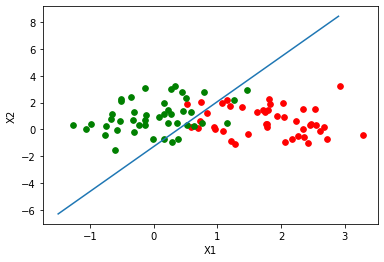

In [29]:
### 绘制对数几率回归分类决策边界
def plot_decision_boundary(X_train, y_train, params):
    '''
    输入：
    X_train: 训练集输入
    y_train: 训练集标签
    params：训练好的模型参数
    输出：
    分类决策边界图
    '''
    # 训练样本量
    n = X_train.shape[0]
    # 初始化类别坐标点列表
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    # 获取两类坐标点并存入列表
    for i in range(n):
        if y_train[i] == 1:
            xcord1.append(X_train[i][0])
            ycord1.append(X_train[i][1])
        else:
            xcord2.append(X_train[i][0])
            ycord2.append(X_train[i][1])
    # 创建绘图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # 绘制两类散点，以不同颜色表示
    ax.scatter(xcord1, ycord1,s=32, c='red')
    ax.scatter(xcord2, ycord2, s=32, c='green')
    # 取值范围
    x = np.arange(-1.5, 3, 0.1)
    # 分类决策边界公式
    y = (-params['b'] - params['w'][0] * x) / params['w'][1]
    # 绘图
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
plot_decision_boundary(X_train, y_train, params)

In [30]:
# 导入对数几率回归模块
from sklearn.linear_model import LogisticRegression
# 拟合训练集
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
# 预测测试集
y_pred = clf.predict(X_test)
# 打印预测结果
print(y_pred)

[0 1 1 0 1 1 0 0 1 0]


D:\Anaconda\envs\Research\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
